#### **PRIMERO IMPORTAMOS LAS BIBLIOTECAS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Inicializamos los datasets**

In [4]:
ruta = "/content/drive/MyDrive/Colab/data/All_Pokemon.csv"

In [6]:
Pokemones = pd.read_csv(ruta, index_col="Number")
Pokemones.head()

,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


#### **Mostrando información del Dataset**

In [7]:
Pokemones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1034 entries, 1 to 900
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     1034 non-null   object 
 1   Type 1                   1034 non-null   object 
 2   Type 2                   549 non-null    object 
 3   Abilities                1034 non-null   object 
 4   HP                       1034 non-null   int64  
 5   Att                      1034 non-null   int64  
 6   Def                      1034 non-null   int64  
 7   Spa                      1034 non-null   int64  
 8   Spd                      1034 non-null   int64  
 9   Spe                      1034 non-null   int64  
 10  BST                      1034 non-null   int64  
 11  Mean                     1034 non-null   float64
 12  Standard Deviation       1034 non-null   float64
 13  Generation               1034 non-null   float64
 14  Experience type          1034 

#### **Verificando si hay valores duplicados**

In [13]:
duplicados = Pokemones.duplicated().sum()
if duplicados > 0:
    print(f"Se encontraron duplicados: {duplicados}, procediendo a eliminarlos")
    Pokemones.drop_duplicates(inplace=True)
else:
    print("No se encontraro duplicados")
print("Dimensiones tras el paso de los duplicados:",Pokemones.shape)

No se encontraro duplicados
Dimensiones tras el paso de los duplicados: (1032, 43)


#### **Mostrando datos nulos**

In [16]:
Pokemones.isnull()

,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
Number,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
897,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### **Identificando las columnas con datos nulos**

In [19]:
columnas_nulas = Pokemones.isnull().sum()
columnas_nulas

,0
Name,0
Type 1,0
Type 2,484
Abilities,0
HP,0
Att,0
Def,0
Spa,0
Spd,0
Spe,0


#### **Identificando las filas especificas con datos nulos**

In [20]:
filas_nulas = Pokemones[Pokemones.isnull().any(axis=1)]
filas_nulas

,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
Number,,,,,,,,,,,,,,,,,,,,,
4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
5,Charmeleon,Fire,NaN,"['Blaze', 'Solar Power']",58,64,58,80,65,80,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,1.1,19.0,15.7
7,Squirtle,Water,NaN,"['Rain Dish', 'Torrent']",44,48,65,50,64,43,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.5,9.0,36.0
8,Wartortle,Water,NaN,"['Rain Dish', 'Torrent']",59,63,80,65,80,58,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,22.5,22.5
9,Blastoise,Water,NaN,"['Rain Dish', 'Torrent']",79,83,100,85,105,78,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.6,85.5,33.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,Kubfu,Fighting,NaN,['Inner Focus'],60,90,60,53,50,72,...,0.5,0.5,1.0,1.0,0.5,1.0,2.0,0.6,12.0,33.3
894,Regieleki,Electric,NaN,['Transistor'],80,100,50,100,50,200,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.2,145.0,100.7
895,Regidrago,Dragon,NaN,"[""Dragon's Maw""]",200,100,50,100,50,80,...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.1,200.0,45.4


In [21]:
total_nulos = columnas_nulas.sum()
print("El total de columnas nulas es:", total_nulos)

El total de columnas nulas es: 484


#### **Remover los datos nulos del Dataset**

In [22]:
Pokemones_sin_nulos = Pokemones.dropna()
Pokemones_sin_nulos

,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,...,1.00,1.0,1.0,1.0,1.00,1.0,0.5,0.7,6.9,14.1
2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,...,1.00,1.0,1.0,1.0,1.00,1.0,0.5,1.0,13.0,13.0
3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,...,1.00,1.0,1.0,1.0,1.00,1.0,0.5,2.0,100.0,25.0
3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,...,1.00,1.0,1.0,1.0,1.00,1.0,0.5,2.4,155.5,27.0
6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,100,...,0.25,4.0,1.0,1.0,1.00,0.5,0.5,1.7,90.5,31.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,Urshifu Single Strike Style,Fighting,Dark,['Unseen Fist'],100,130,100,63,60,97,...,1.00,0.5,0.5,1.0,0.25,1.0,4.0,1.9,105.0,29.1
893,Zarude,Dark,Grass,['Leaf Guard'],105,120,105,70,95,105,...,4.00,1.0,0.5,1.0,0.50,1.0,2.0,1.8,70.0,21.6
898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,80,...,4.00,1.0,2.0,1.0,2.00,1.0,1.0,1.1,7.7,6.4


#### **Filtrando los Pokemon de tipo fuego**

In [35]:
# Función que filtra por tipo feugo
def filtro_fire(tipos):
    return 'Fire' in tipos

# Aplicar un filtro para consultar y llamar la función filtro_fire
Pokemones_tipo_fuego = Pokemones[Pokemones['Type 1'].apply(filtro_fire)] # Creando un nuevo dataframe con los Pokemones de tipo fuego

# Mostrar el Dataset filtrado, incluyendo solo las columnas (Nombre, Generación, Ataque y Defensa)
PokemonesTF = Pokemones_tipo_fuego[['Name', 'Generation','Att','Def']]
PokemonesTF.head(20) # que se muestren los primeros 20 Pokemones de tipo fuego

,Name,Generation,Att,Def
Number,,,,
4,Charmander,1.0,52,43
5,Charmeleon,1.0,64,58
6,Charizard,1.0,84,78
6,Mega Charizard Y,6.0,104,78
6,Mega Charizard X,6.0,130,111
37,Vulpix,1.0,41,40
38,Ninetales,1.0,76,75
58,Growlithe,1.0,70,45
59,Arcanine,1.0,110,80


In [36]:
PokemonesTF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 4 to 851
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        64 non-null     object 
 1   Generation  64 non-null     float64
 2   Att         64 non-null     int64  
 3   Def         64 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.5+ KB


In [37]:
PokemonesTF.describe()

,Generation,Att,Def
count,64.000000,64.000000,64.000000
mean,4.250000,85.640625,68.078125
std,2.329929,27.605134,24.577900
min,1.000000,30.000000,37.000000
25%,2.000000,64.750000,49.500000
50%,5.000000,84.500000,64.000000
75%,6.000000,104.000000,78.000000
max,8.000000,160.000000,140.000000


#### **Graficar los primeros 10 videojuegos RPG y su Rating de popularidad (Gráfico de Barra)**

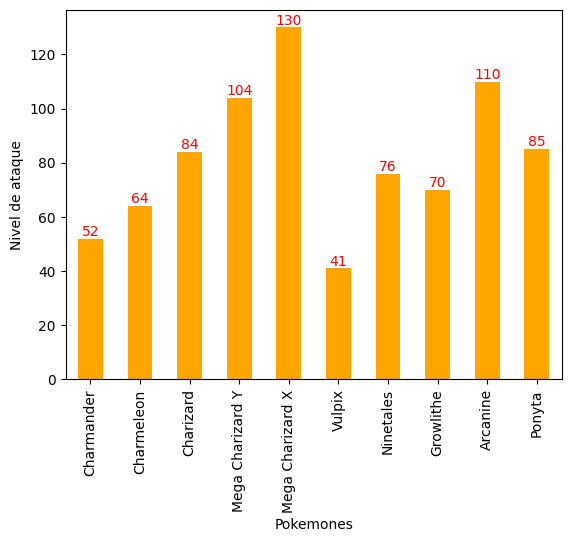

In [61]:
graficoTipoFuego = PokemonesTF.head(10) # graficoRPG solo tiene los primeros 10 Pokemones de tipo feugo

graficoTipoFuego.set_index('Name', inplace=True) # Estableece la columna 'Name' como indice

Ataque = graficoTipoFuego['Att'].plot(kind='bar', color='orange')

for i,Att in enumerate(graficoTipoFuego['Att']):
  Ataque.annotate(str(Att), xy=(i, Att), ha='center', va='bottom', color='red')
plt.xlabel("Pokemones")
plt.ylabel("Nivel de ataque")
plt.tight_layout
plt.show()

#### **Graficar los primeros 10 videojuegos RPG y su Generación (Gráfico de Líneas)**

AttributeError: 'float' object has no attribute 'annotate'

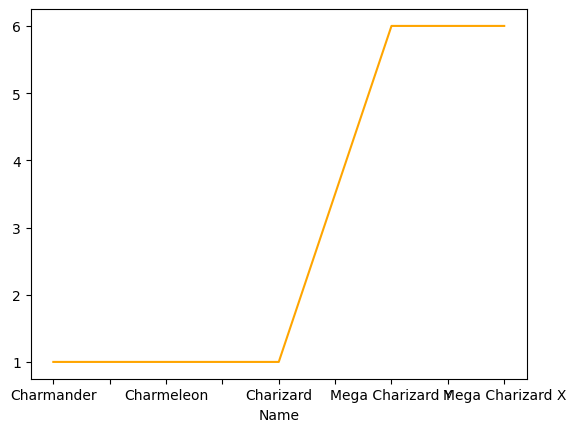

In [65]:
graficoTipoFuego = PokemonesTF.head() # graficoRPG solo tiene los primeros 10 Pokemones de tipo fuego

graficoTipoFuego.set_index('Name', inplace=True) # Estableece la columna 'Name' como indice

Generaciones = graficoTipoFuego['Generation'].plot(kind='line', color='orange')

for i,Generations in enumerate(graficoTipoFuego['Generation']):
    Generations.annotate(str(Generations), xy=(i, Generations), ha='center', va='bottom', color='red')
plt.xlabel("Pokemones")
plt.ylabel("Generaciones")
plt.tight_layout
plt.show()